#### Python notebook using data from https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/data

## Description
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include, for example, the passenger safety cell with crumple zone, the airbag and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium car makers. Daimler’s Mercedes-Benz cars are leaders in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of each and every unique car configuration before they hit the road, Daimler’s engineers have developed a robust testing system. But, optimizing the speed of their testing system for so many possible feature combinations is complex and time-consuming without a powerful algorithmic approach. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Daimler’s production lines.
<img src="https://storage.googleapis.com/kaggle-competitions/kaggle/6565/media/daimler-mercedes%20V02.jpg" />
In this competition, Daimler is challenging Kagglers to tackle the curse of dimensionality and reduce the time that cars spend on the test bench. Competitors will work with a dataset representing different permutations of Mercedes-Benz car features to predict the time it takes to pass testing. Winning algorithms will contribute to speedier testing, resulting in lower carbon dioxide emissions without reducing Daimler’s standards.

## Data
Dataset contains an anonymized set of variables, each representing a custom feature in a Mercedes car. For example, a variable could be 4WD, added air suspension, or a head-up display.
The ground truth is labeled `y` and represents the time (`in seconds`) that the car took to pass testing for each variable.

`File descriptions`
Variables with letters are categorical. Variables with 0/1 are binary values.

* `train.csv` - the training set
* `test.csv` - the test set, you must predict the `y` variable for the 'ID's in this file
* `sample_submission.csv` - a sample submission file in the correct format

## Evaluation
Submissions are evaluated on the R^2 value.

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

### 1. General information about data

In [3]:
train = pd.read_csv("data/train.csv.zip")
test = pd.read_csv("data/test.csv.zip")
sub = pd.read_csv("data/sample_submission.csv.zip")

print("Train shape : ", train.shape)
print("Test shape : ", test.shape)

Train shape :  (4209, 378)
Test shape :  (4209, 377)


In [4]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


### 2. Exploratory Data Analysis

#### 2.1 Target analysis

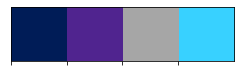

In [5]:
colors = ['#001c57', '#50248f', '#a6a6a6', '#38d1ff']
sns.palplot(sns.color_palette(colors))

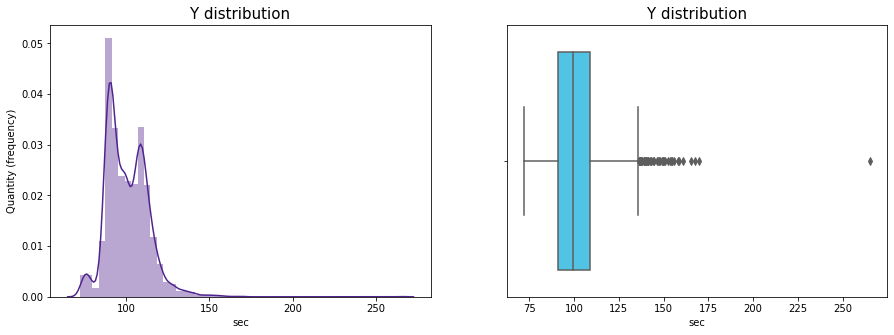

In [9]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(train.y.values, bins=50, color=colors[1])
plt.title('Y distribution', fontsize=15)
plt.xlabel('sec')
plt.ylabel('Quantity (frequency)');

plt.subplot(122)
sns.boxplot(train.y.values, color=colors[3])
plt.title('Y distribution', fontsize=15)
plt.xlabel('sec');

In [11]:
train.y.describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

The target `y` has a standard distribution of about 72 to 140 seconds. The first and third quartiles lie in the range from about 91 to 109 seconds, the median is 100 seconds, we also note that there are outliers starting from 140 seconds that we can remove from the training sample, since these values will add noise to our algorithm.

#### 2.2 Data types